In [ ]:
!git clone https://github.com/PradyotC/DSIPData/

Cloning into 'DSIPData'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
import subprocess

In [ ]:
max_val = 8
max_pt = -1
max_kp = 0

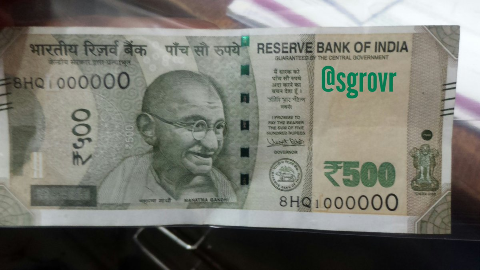

In [ ]:
orb = cv2.ORB_create()
# orb is an alternative to SIFT
 
#test_img = read_img('files/test_100_2.jpg')
#test_img = read_img('files/test_50_2.jpg')
#test_img = read_img('files/test_20_2.jpg')
test_img = cv2.imread('/content/DSIPData/test_500_1.jpg')
#test_img = read_img('files/test_100_3.jpg')
#test_img = read_img('files/test_20_4.jpg')
 
# resizing must be dynamic
original = cv2.resize(test_img,(0,0),fx = 0.4, fy = 0.4)
cv2_imshow(original)

# keypoints and descriptors
# (kp1, des1) = orb.detectAndCompute(test_img, None)
(kp1, des1) = orb.detectAndCompute(test_img, None)
 
training_set = ['/content/DSIPData/data/train20.jpg', '/content/DSIPData/data/train50.jpg', '/content/DSIPData/data/train100.jpg', '/content/DSIPData/data/train500.jpg']

In [ ]:
 for i in range(0, len(training_set)):
    # train image
    train_img = cv2.imread(training_set[i])
 
    (kp2, des2) = orb.detectAndCompute(train_img, None)
 
    # brute force matcher
    bf = cv2.BFMatcher()
    all_matches = bf.knnMatch(des1, des2, k=2)
 
    good = []
    # give an arbitrary number -> 0.789
    # if good -> append to list of good matches
    for (m, n) in all_matches:
        if m.distance < 0.789 * n.distance:
            good.append([m])
 
    if len(good) > max_val:
        max_val = len(good)
        max_pt = i
        max_kp = kp2
 
    print(i, ' ', training_set[i], ' ', len(good))

0   /content/DSIPData/data/train20.jpg   10
1   /content/DSIPData/data/train50.jpg   10
2   /content/DSIPData/data/train100.jpg   10
3   /content/DSIPData/data/train500.jpg   19


train500.jpg
good matches  19

Detected denomination: Rs. 500


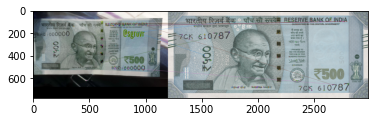

In [ ]:
if max_val != 8:
    print(training_set[max_pt][23:])
    print('good matches ', max_val)
    train_img = cv2.imread(training_set[max_pt])
    img3 = cv2.drawMatchesKnn(test_img, kp1, train_img, max_kp, good, 4)
    note = str(training_set[max_pt])[28:-4]
    print('\nDetected denomination: Rs.', note)
    (plt.imshow(img3), plt.show())
else:
    print('No Matches')